<a href="https://colab.research.google.com/github/heloysa-bezerra/heloysa-bezerra/blob/main/2Mpc_N256_SN_BH_09_Mhalo3e7_vW1e3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy
import matplotlib
import matplotlib.pyplot as plt
import os

PROTONMASS   = 1.6726e-24
ELECTRONMASS = 9.10953e-28
GRAVITY      = 6.672e-8
SOLAR_MASS   = 1.989e+33
CM_PER_KPC   = 3.085678e+21
HUBBLE       = 3.2407789e-18    # Units of (h/sec).

HubbleParam = 0.6774             # h = Hubble constant in units of 100 km/s/Mpc.
OmegaMatter = 0.3089             # paramêtros de referência (de acordo com artigo da profª)
OmegaBaryon = 0.0486

UnitLength_in_cm         = 3.08568e+21 / HubbleParam      # 1 kpc/h.
UnitMass_in_g            = 1.989e+43 / HubbleParam        # 1.0e+10 M_Sun/h.
UnitMass_in_Msun         = 1.0e+10 / HubbleParam          # 1.0e+10 /h.
UnitVelocity_in_cm_per_s = 1.0e+5                         # 1 km/sec.

rho_Critical_0 = 3.0 * numpy.power((HUBBLE * HubbleParam), 2) / (8.0 * numpy.pi * GRAVITY)
rho_Matter_0   = OmegaMatter * rho_Critical_0
rho_Baryon_0   = OmegaBaryon * rho_Critical_0

print ("\n Present Critical Density of the Universe, rho_Critical_0 = %e" % rho_Critical_0)
print (" Present Mean Matter (DM + Baryon) Density, rho_Matter_0 = %e" % rho_Matter_0)
print (" Present Mean Baryon Density, rho_Baryon_0 = %e \n" % rho_Baryon_0)



 Present Critical Density of the Universe, rho_Critical_0 = 8.622130e-30
 Present Mean Matter (DM + Baryon) Density, rho_Matter_0 = 2.663376e-30
 Present Mean Baryon Density, rho_Baryon_0 = 4.190355e-31 



In [ ]:

redshift = 4.5
print (" Current Redshift = %e \n" % redshift)

# READ SUBFIND (ON-THE-FLY) OUTPUT DATA FILE FOR SUB-HALO INFORMATION.

filename = "Group_Mass_Data.txt"
print ("...... Reading ... filename = %s" % filename)

alldata = numpy.loadtxt(filename)

Ngroups = alldata.shape[0]
print (" Number of Groups / lines read, Ngroups = %d \n" % Ngroups)

TotMassGroup_Msun = alldata[:, 0] * UnitMass_in_Msun
Gas_Mass          = alldata[:, 1] * UnitMass_in_Msun
DarkMatter_Mass   = alldata[:, 2] * UnitMass_in_Msun
CoarseRes_Mass    = alldata[:, 3]
Star_Mass         = alldata[:, 4] * UnitMass_in_Msun
BH_Mass           = alldata[:, 5] * UnitMass_in_Msun
Vel_Disp          = alldata[:, 6]
r_Half_Mass       = alldata[:, 7]

print (" TotMassGroup_Msun : MIN=%e, MAX=%e" % (numpy.amin(TotMassGroup_Msun), numpy.amax(TotMassGroup_Msun)))
print (" DarkMatter_Mass : MIN=%e, MAX=%e" % (numpy.amin(DarkMatter_Mass), numpy.amax(DarkMatter_Mass)))
print (" CoarseRes_Mass  : MIN=%e, MAX=%e \n" % (numpy.amin(CoarseRes_Mass), numpy.amax(CoarseRes_Mass)))

print (" Gas_Mass : MIN=%e, MAX=%e" % (numpy.amin(Gas_Mass), numpy.amax(Gas_Mass)))
print (" Gas_Mass : MIN(> 0)=%e \n" % (numpy.amin( Gas_Mass[numpy.where(Gas_Mass > 0.0)] )))

print (" Star_Mass : MIN=%e, MAX=%e" % (numpy.amin(Star_Mass), numpy.amax(Star_Mass)))
print (" Star_Mass : MIN(> 0)=%e \n" % (numpy.amin( Star_Mass[numpy.where(Star_Mass > 0.0)] )))

print (" BH_Mass : MIN=%e, MAX=%e" % (numpy.amin(BH_Mass), numpy.amax(BH_Mass)))
print (" BH_Mass : MIN(> 0)=%e \n" % (numpy.amin( BH_Mass[numpy.where(BH_Mass > 0.0)] )))

print (" Vel_Disp    : MIN=%e, MAX=%e" % (numpy.amin(Vel_Disp), numpy.amax(Vel_Disp)))
print (" r_Half_Mass : MIN=%e, MAX=%e \n" % (numpy.amin(r_Half_Mass), numpy.amax(r_Half_Mass)))


 Current Redshift = 4.500000e+00 

...... Reading ... filename = Group_Mass_Data.txt
 Number of Groups / lines read, Ngroups = 12594 

 TotMassGroup_Msun : MIN=1.017005e+06, MAX=9.855723e+09
 DarkMatter_Mass : MIN=1.017005e+06, MAX=8.760021e+09
 CoarseRes_Mass  : MIN=0.000000e+00, MAX=0.000000e+00 

 Gas_Mass : MIN=0.000000e+00, MAX=9.180273e+08
 Gas_Mass : MIN(> 0)=9.494128e+03 

 Star_Mass : MIN=0.000000e+00, MAX=1.562675e+08
 Star_Mass : MIN(> 0)=1.614359e+03 

 BH_Mass : MIN=0.000000e+00, MAX=7.922645e+05
 BH_Mass : MIN(> 0)=1.000000e+03 

 Vel_Disp    : MIN=1.152401e+00, MAX=4.335275e+01
 r_Half_Mass : MIN=3.849496e-02, MAX=3.356051e+00 



In [ ]:

Index_Massive = numpy.where(TotMassGroup_Msun > 1.0e+7)

TotMassGroup_Msun = TotMassGroup_Msun[Index_Massive]
Gas_Mass          = Gas_Mass[Index_Massive]
DarkMatter_Mass   = DarkMatter_Mass[Index_Massive]
Star_Mass         = Star_Mass[Index_Massive]
BH_Mass           = BH_Mass[Index_Massive]
Vel_Disp          = Vel_Disp[Index_Massive]
r_Half_Mass       = r_Half_Mass[Index_Massive]

print (" ...... No. of Massive Groups = %d \n" % TotMassGroup_Msun.size)


 ...... No. of Massive Groups = 1762 



In [ ]:
#print " GroupMass ="
#print (GroupMass)
#print "\n"

# VIRIAL RADIUS : R_200 (in Comoving Coordinates) FOR CHOSEN HALO MASS.

factor = (4.0 * numpy.pi / 3.0) * (200.0 * rho_Matter_0)

GroupMassTot_g = TotMassGroup_Msun * SOLAR_MASS

R200_Comoving_cm    = numpy.power((GroupMassTot_g / factor), (1.0/3.0))
R200_Comoving_kpc   = R200_Comoving_cm / CM_PER_KPC
R200_Comoving_UnitL = R200_Comoving_cm / UnitLength_in_cm

print (" R200_Comoving_kpc : MIN=%e, MAX=%e" % (numpy.amin(R200_Comoving_kpc), numpy.amax(R200_Comoving_kpc)))
print (" R200_Comoving_UnitL : MIN=%e, MAX=%e \n" % (numpy.amin(R200_Comoving_UnitL), numpy.amax(R200_Comoving_UnitL)))

# BLACK HOLE VERSUS STELLAR BULGE RELATION FROM Marconi & Hunt (2003, http://adsabs.harvard.edu/abs/2003ApJ...589L..21M).
MBH_MstellarBulge = 0.002

 R200_Comoving_kpc : MIN=6.723525e+00, MAX=6.687136e+01
 R200_Comoving_UnitL : MIN=4.554513e+00, MAX=4.529863e+01 



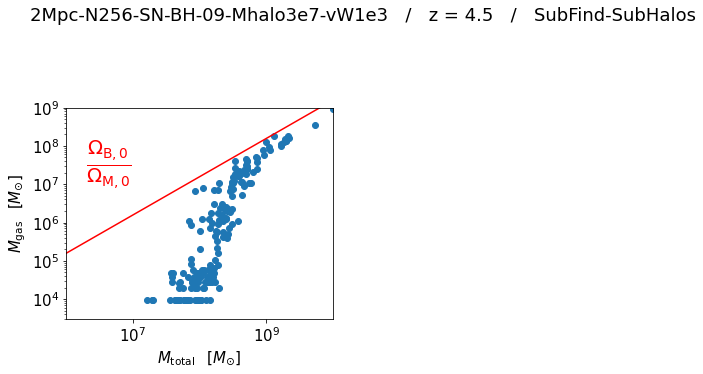

In [ ]:
matplotlib.rcParams.update({'font.size': 15})
plt.figure(figsize=(11, 14))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.suptitle("2Mpc-N256-SN-BH-09-Mhalo3e7-vW1e3   /   z = " + str(redshift) + "   /   SubFind-SubHalos")

TotMin = 1.0e+6
TotMax = 1.0e+10
GasMin = 3.0e+3
GasMax = 1.0e+9
BhMin = 1.0e+2
BhMax = 1.0e+6
StarMin = 1.0e+3
StarMax = 1.0e+9

TotGas = plt.subplot(321)
TotGas.scatter(TotMassGroup_Msun, Gas_Mass, marker='o')
TotGas.set_yscale('log')
TotGas.set_xscale('log')
plt.plot([TotMin, TotMax], [(OmegaBaryon/OmegaMatter)*TotMin, (OmegaBaryon/OmegaMatter)*TotMax], color='red')
plt.text(2.0e+6, 2.0e+7, r'$\frac{\Omega_{\rm B,0}}{\Omega_{\rm M,0}}$', fontsize=28, color='red')
plt.xlabel(r'$M_{\rm total} \;\;\; [M_{\odot}]$')
plt.xlim(TotMin, TotMax)
plt.ylabel(r'$M_{\rm gas} \;\;\; [M_{\odot}]$')
plt.ylim(GasMin, GasMax)
plt.savefig('MgasMtot.png', format='png')
plt.savefig('MgasMtot.eps', format='eps')



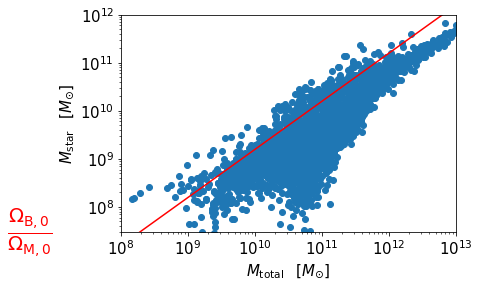

In [ ]:
TotStar = plt.subplot(111)
TotStar.scatter(TotMassGroup_Msun, Star_Mass, marker='o')
TotStar.set_yscale('log')
TotStar.set_xscale('log')
plt.plot([TotMin, TotMax], [(OmegaBaryon/OmegaMatter)*TotMin, (OmegaBaryon/OmegaMatter)*TotMax], color='red')
plt.text(2.0e+6, 2.0e+7, r'$\frac{\Omega_{\rm B,0}}{\Omega_{\rm M,0}}$', fontsize=28, color='red')
plt.xlabel(r'$M_{\rm total} \;\;\; [M_{\odot}]$')
plt.xlim(TotMin, TotMax)
plt.ylabel(r'$M_{\rm star} \;\;\; [M_{\odot}]$')
plt.ylim(GasMin, GasMax)
plt.savefig('MstarMtot.png', format='png')
plt.savefig('MstarMtot.eps', format='eps')


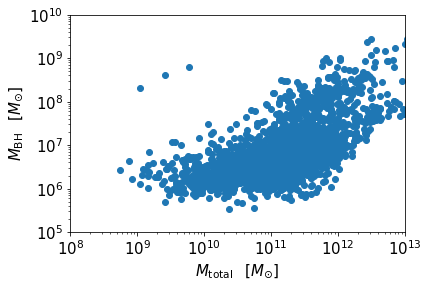

In [ ]:

TotBH = plt.subplot(111)
TotBH.scatter(TotMassGroup_Msun, BH_Mass, marker='o')
TotBH.set_yscale('log')
TotBH.set_xscale('log')
plt.xlabel(r'$M_{\rm total} \;\;\; [M_{\odot}]$')
plt.xlim(TotMin, TotMax)
plt.ylabel(r'$M_{\rm BH} \;\;\; [M_{\odot}]$')
plt.ylim(BhMin, BhMax)
plt.savefig('MbhMtot.png', format='png')
plt.savefig('MbhMtot.eps', format='eps')


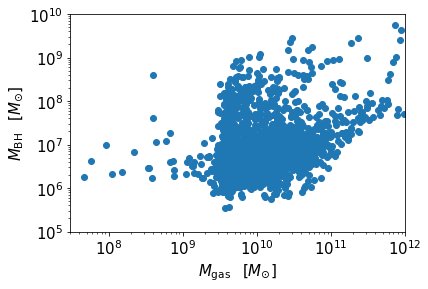

In [ ]:

GasBH = plt.subplot(111)
GasBH.scatter(Gas_Mass, BH_Mass, marker='o')
GasBH.set_yscale('log')
GasBH.set_xscale('log')
plt.xlabel(r'$M_{\rm gas} \;\;\; [M_{\odot}]$')
plt.xlim(GasMin, GasMax)
plt.ylabel(r'$M_{\rm BH} \;\;\; [M_{\odot}]$')
plt.ylim(BhMin, BhMax)
plt.savefig('MbhMgas.png', format='png')
plt.savefig('MbhMgas.eps', format='eps')



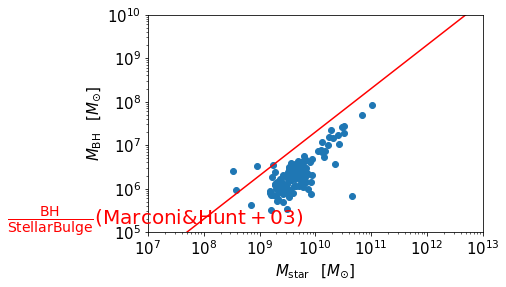

In [ ]:

StarBH = plt.subplot(111)
StarBH.scatter(Star_Mass, BH_Mass, marker='o')
StarBH.set_yscale('log')
StarBH.set_xscale('log')
plt.plot([StarMin, StarMax], [MBH_MstellarBulge*StarMin, MBH_MstellarBulge*StarMax], color='red')
plt.text(3.0e+4, 1.5e+5, r'$\frac{\rm BH}{\rm StellarBulge} {\rm (Marconi&Hunt+03)}$', fontsize=20, color='red')
plt.xlabel(r'$M_{\rm star} \;\;\; [M_{\odot}]$')
plt.xlim(StarMin, StarMax)
plt.ylabel(r'$M_{\rm BH} \;\;\; [M_{\odot}]$')
plt.ylim(BhMin, BhMax)
plt.savefig('MbhMstar.png', format='png')
plt.savefig('MbhMstar.eps', format='eps')



In [ ]:
import math 
omegaM = 0.3089
omegaL = 0.6911
#cte de Hubble = 67.74 km s^-1 Mpc^-1 => convertendo Mpc em Km => 1 Mpc = 3.086*10^19 => 67.74/3.086*10^19 = 
cteHubble = 2.185*(10**(-18))

pt1 = (2/3)*((1+(omegaM/omegaL))**(1/2))
parametro = (omegaL/omegaM)**(1/2)

def t(z): 
  tsec = pt1*(1/cteHubble)*(math.asinh(parametro)-math.asinh(parametro*((1+z)**(-3/2))))
  tGyr = tsec*(3.1688*10**(-8))/10**9
  return tGyr

def f(z): 
  tsec = pt1*(1/cteHubble)*(math.asinh(parametro*((1+z)**(-3/2))))
  tGyr = tsec*(3.1688*10**(-8))/10**9
  return tGyr

tempohj=t(2.5)
tempobb=f(2.5)
print(tempohj)
print(tempobb)

11.233657399722933
2.634112519769379
